In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cancer_data = pd.read_csv('cancer_data.csv')
cancer_data = cancer_data.drop(columns = ['Unnamed: 0'])
cancer_data = cancer_data.iloc[:, :12]
cancer_data.head()

,diagnosis,children,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,Yes,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,No,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,Yes,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,No,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,Yes,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


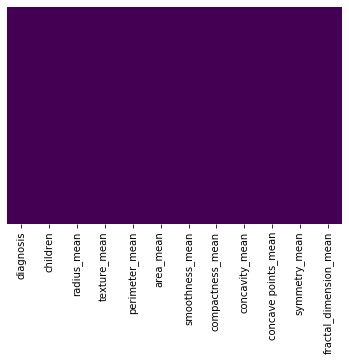

In [2]:
#Check if is there any null data
sns.heatmap(cancer_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') # Check the NA

In [3]:
children = pd.get_dummies(cancer_data['children'], drop_first = True)
diagnosis = pd.get_dummies(cancer_data['diagnosis'], drop_first = True)
cancer_data = pd.concat([diagnosis,cancer_data, children], axis = 1)
cancer_data = cancer_data.iloc[:,[0,3,6,7,8,9,10,11,12, 13]]
cancer_data = cancer_data.rename(columns = {'Yes':'Child', 'M':'Diagnosis'})
cancer_data.head()

,Diagnosis,radius_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Child
0,1,17.99,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,1,20.57,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,1,19.69,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,1,11.42,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,1,20.29,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [4]:
X = cancer_data.iloc[:, 1:]
y = cancer_data.iloc[:,0]

In [5]:
X.head()

,radius_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Child
0,17.99,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
print("Training size: %d" %len(y_train))
print("Test size    : %d" %len(y_test))

Training size: 455
Test size    : 114


In [7]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [8]:
X_train

array([[ 1.0449852 ,  0.90312805,  0.52642027, ...,  0.66363209,
        -0.30258962,  1.05189423],
       [ 1.68141074,  1.74602236,  0.28608701, ..., -0.00849186,
        -0.57977321,  1.05189423],
       [-1.44260855, -1.15482615, -1.91696783, ..., -0.08562083,
         0.8359494 , -0.95066592],
       ...,
       [ 0.82638686,  0.7311257 ,  0.78131917, ...,  0.42489954,
         0.32032833,  1.05189423],
       [-0.05077356, -0.16891866, -0.41306428, ..., -1.08095192,
        -0.65130446,  1.05189423],
       [-0.32748032, -0.3886841 , -0.47642487, ..., -1.26459234,
        -0.6095779 , -0.95066592]])

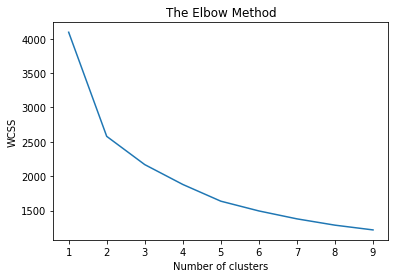

In [34]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import accuracy_score

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
start = time.time()
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_train, y_train)

#Prediciting the test set results
y_pred = kmeans.predict(X_test)
scores = cross_val_score(kmeans, X, y)

end = time.time()

accuracy_all = accuracy_score(y_test, y_pred)

print("K_Means Accuracy: {0:.2%}".format(accuracy_all))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

print(scores)

K_Means Accuracy: 85.96%
Cross validation score: -429206405.73% (+/- 255237433.48%)
Execution time: 0.27495 seconds 

[-3722189.54496123 -6414191.10611673 -3057931.9036246  -3199889.24313898
 -5066118.48843339]


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[69  3]
 [13 29]]


              precision    recall  f1-score   support

           0       0.84      0.96      0.90        72
           1       0.91      0.69      0.78        42

    accuracy                           0.86       114
   macro avg       0.87      0.82      0.84       114
weighted avg       0.87      0.86      0.85       114

